In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Display all the columns of DataFrame
pd.pandas.set_option('display.max_columns',None)

In [2]:
loan=pd.read_csv('loan_prediction.csv')

In [3]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
loan.shape

(614, 13)

In [6]:
loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [8]:
loan.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

In [9]:
loan.var()

ApplicantIncome      3.732039e+07
CoapplicantIncome    8.562930e+06
LoanAmount           7.325190e+03
Loan_Amount_Term     4.240668e+03
Credit_History       1.331362e-01
dtype: float64

In [10]:
loan.duplicated().any()

# we got no duplicated rows

False

In [11]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [12]:
corr=loan.corr()
print(corr)

                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.116605    0.570909   
CoapplicantIncome        -0.116605           1.000000    0.188619   
LoanAmount                0.570909           0.188619    1.000000   
Loan_Amount_Term         -0.045306          -0.059878    0.039447   
Credit_History           -0.014715          -0.002056   -0.008433   

                   Loan_Amount_Term  Credit_History  
ApplicantIncome           -0.045306       -0.014715  
CoapplicantIncome         -0.059878       -0.002056  
LoanAmount                 0.039447       -0.008433  
Loan_Amount_Term           1.000000        0.001470  
Credit_History             0.001470        1.000000  


In [13]:
corr=loan.corr()
corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


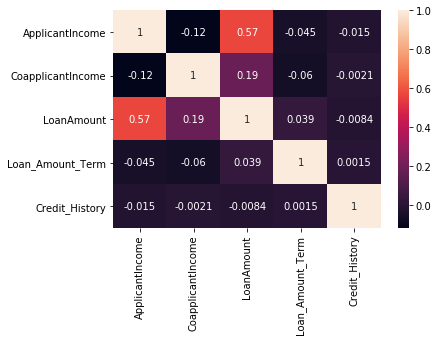

In [14]:
sns.heatmap(loan.corr(),annot=True)

In [15]:
#To check the missing values
loan.isnull().sum().any()

True

In [16]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
## chek the percentage of each columns
loan.isnull().sum()/len(loan)

Loan_ID              0.000000
Gender               0.021173
Married              0.004886
Dependents           0.024430
Education            0.000000
Self_Employed        0.052117
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.035831
Loan_Amount_Term     0.022801
Credit_History       0.081433
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

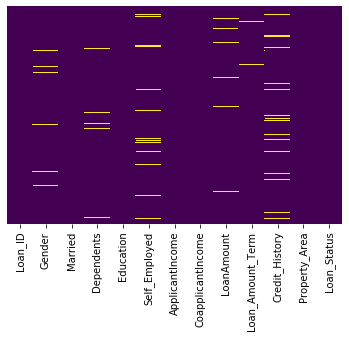

In [18]:
sns.heatmap(loan.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [19]:
# we will change the type of Credit_History to object becaues we can see that it is 1 or 0

loan['Credit_History'] = loan['Credit_History'].astype('O')

In [20]:
import pandas_profiling as pp
pp.ProfileReport(loan)

In [21]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1,Urban,Y


In [22]:
loan['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

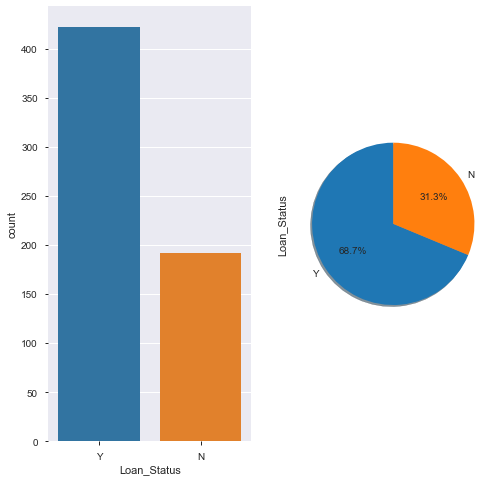

In [23]:
## count  ------plot the frequency of the loan_status
fig1, ax1=plt.subplots(1,2,figsize=(8,8))

#it show the count of observation in each categgorical bin using bars
sns.countplot(loan['Loan_Status'],ax=ax1[0])

labels= 'Y','N'

loan.Loan_Status.value_counts().plot.pie(labels=labels,autopct ='%1.1f%%',shadow=True, startangle=90)

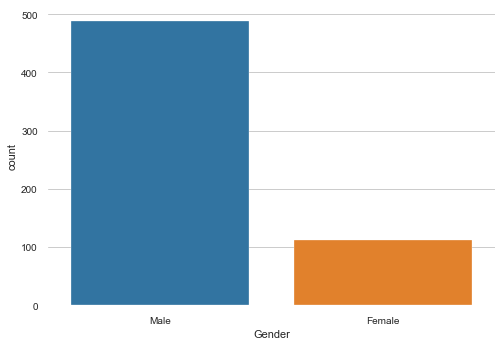

In [24]:
sns.set_style('whitegrid')
sns.countplot(x='Gender',data=loan)

## Observation(s)
from the dataset it is cleat visible maximum number of Mail are apply for less as compare to Femail

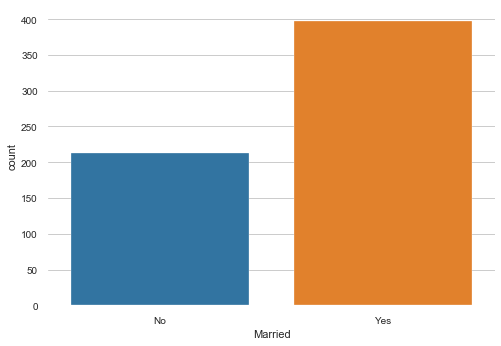

In [25]:
sns.set_style('whitegrid')
sns.countplot(x='Married',data=loan)

# Observation(s)
from the dataset its show 400 people are Married which is apply a loan

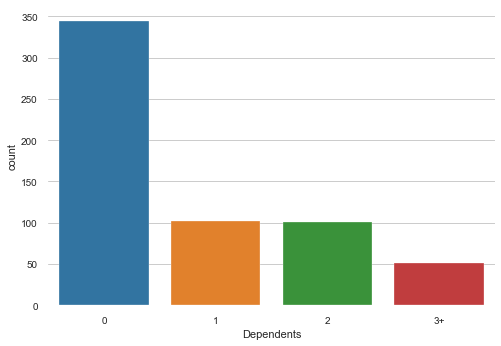

In [26]:
sns.set_style('whitegrid')
sns.countplot(x='Dependents',data=loan)

## Observation(s)
After seen the Dependents status it is clear that there is no dependency onnear about 348 people 

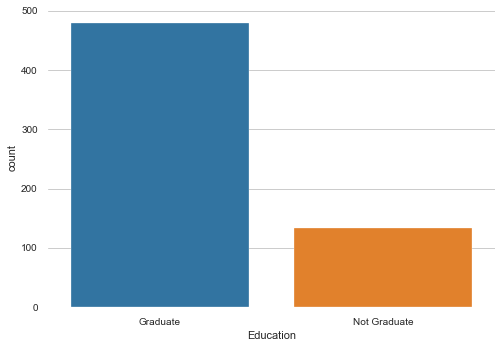

In [27]:
sns.set_style('whitegrid')
sns.countplot(x='Education',data=loan)

## Observation(s)
More than 450 people are Graduate and near about 120 people are not Graduate which is submit a loan application

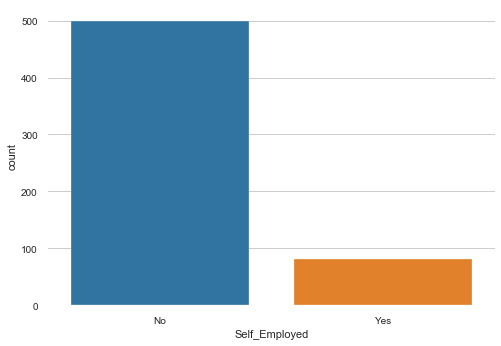

In [28]:
sns.set_style('whitegrid')
sns.countplot(x='Self_Employed',data=loan)

## Observation(s)
After seen the Self_Employed Data it is clear that less then 100 people are Self_Employees
    

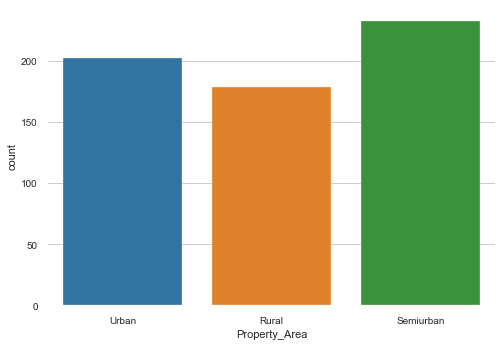

In [29]:
sns.set_style('whitegrid')
sns.countplot(x='Property_Area',data=loan)

## Observation(s)
Maximum number of people are belongs to Semiurban area and less belong to Rural Property Area

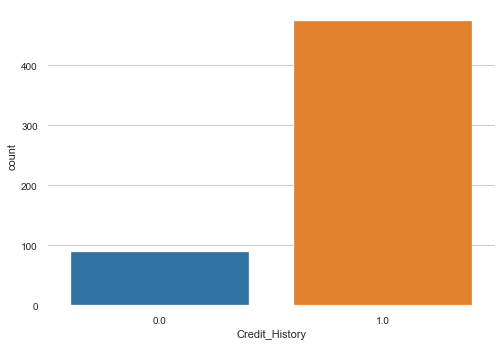

In [30]:
sns.set_style('whitegrid')
sns.countplot(x='Credit_History',data=loan)

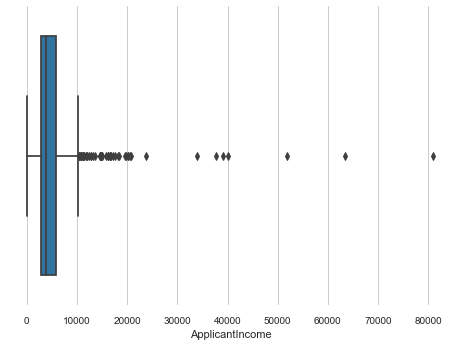

In [31]:
sns.boxplot(x='ApplicantIncome',data=loan)

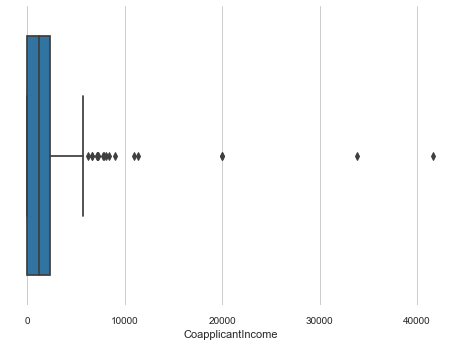

In [32]:
sns.set_style('whitegrid')
sns.boxplot(x='CoapplicantIncome',data=loan)

In [33]:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

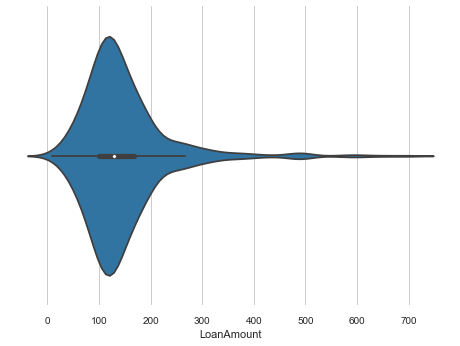

In [34]:
sns.violinplot(x='LoanAmount',data=loan,size=8)
plt.show()

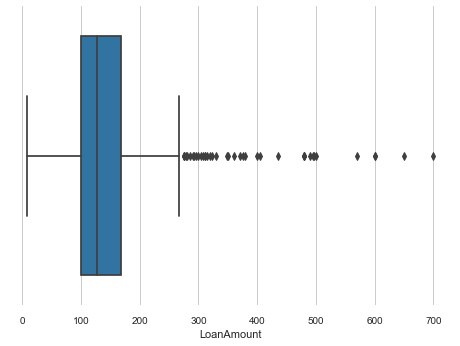

In [35]:
sns.set_style('whitegrid')
sns.boxplot(x='LoanAmount',data=loan)

In [36]:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

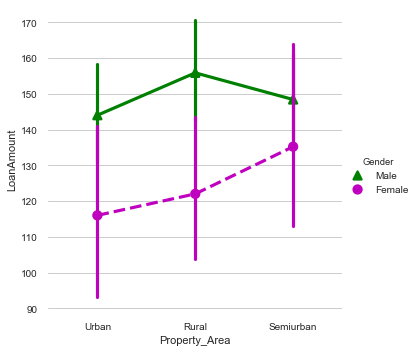

In [37]:
sns.catplot(x= 'Property_Area', y='LoanAmount', hue='Gender',
            palette={"Male": "g", "Female": "m"},
            markers=["^", "o"], linestyles=["-", "--"],
            kind="point", data=loan);


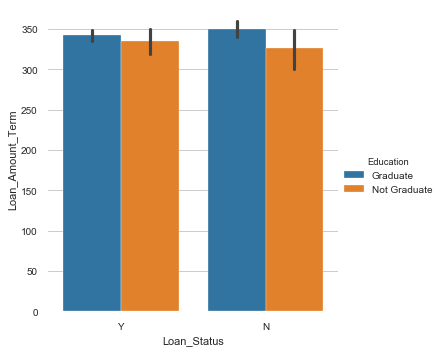

In [38]:
sns.catplot(x='Loan_Status', y='Loan_Amount_Term', hue='Education', kind="bar", data=loan);

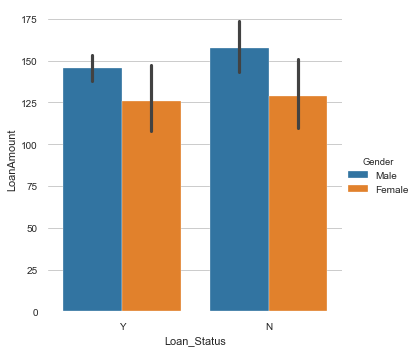

In [39]:
sns.catplot(x='Loan_Status', y='LoanAmount', hue='Gender', kind="bar", data=loan);

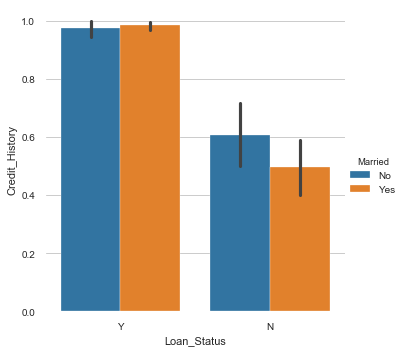

In [40]:
sns.catplot(x='Loan_Status', y='Credit_History', hue='Married', kind="bar", data=loan);

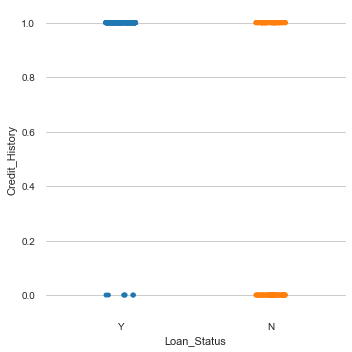

In [41]:

sns.catplot(x='Loan_Status', y='Credit_History', data=loan);

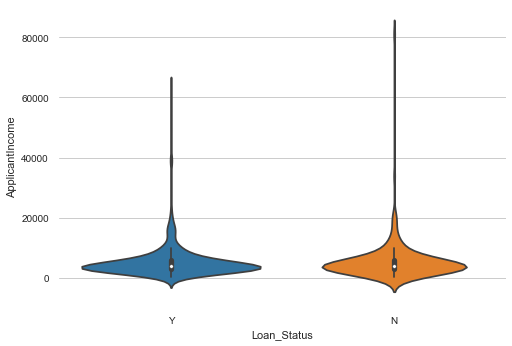

In [42]:
sns.violinplot(x='Loan_Status',y='ApplicantIncome',data=loan,size=8)
plt.show()

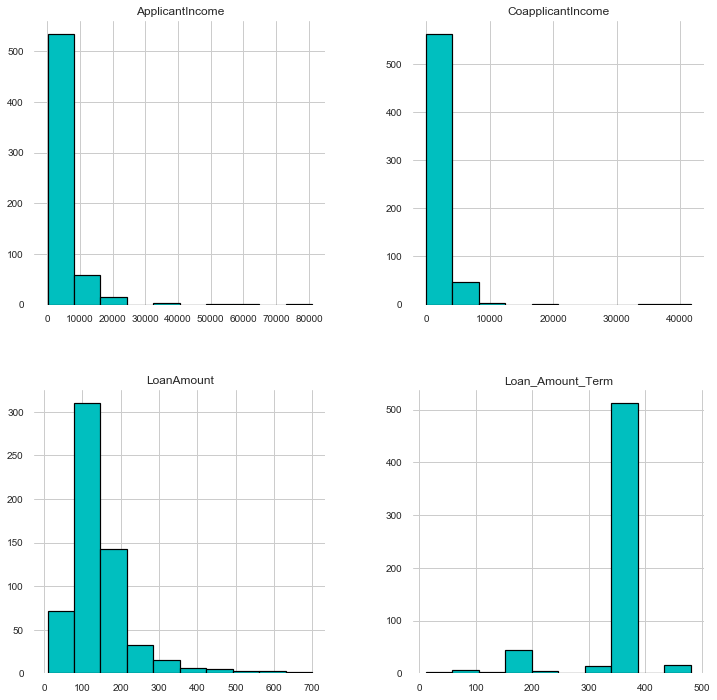

In [43]:
# Distribution of Different Features of the Dataset
distribution = loan.hist(edgecolor = 'black', linewidth = 1.2, color = 'c')
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

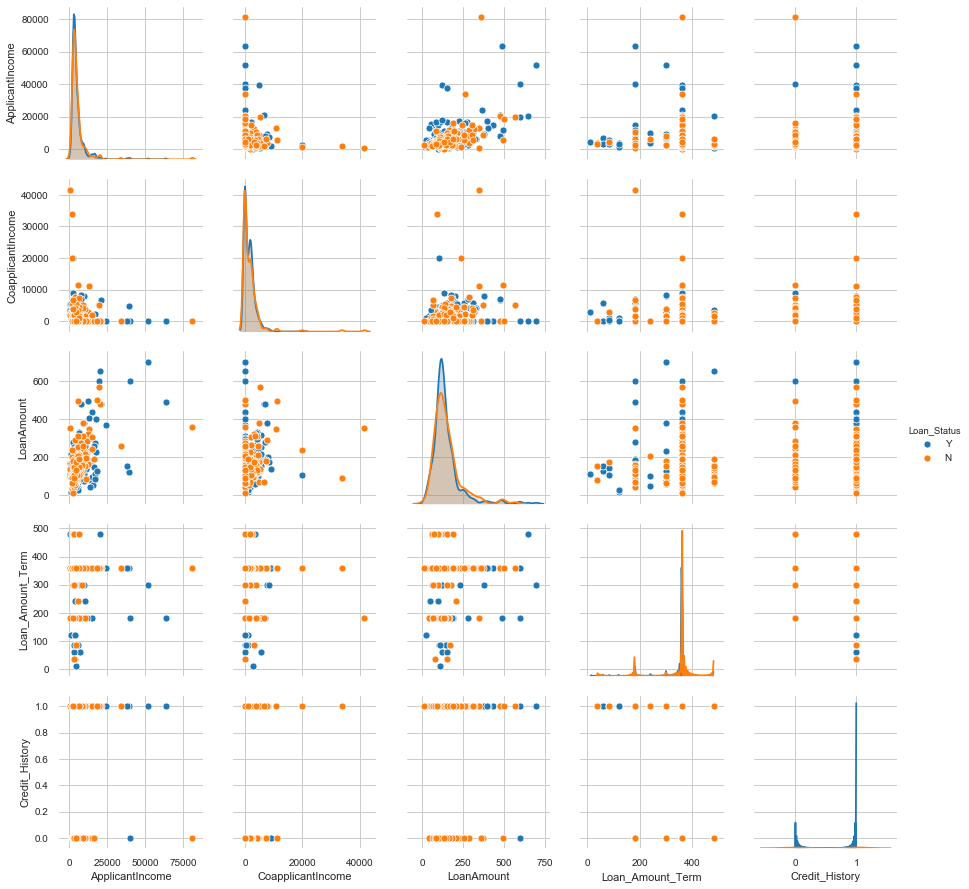

In [44]:
sns.pairplot(loan,hue='Loan_Status')

## Feature Engineering

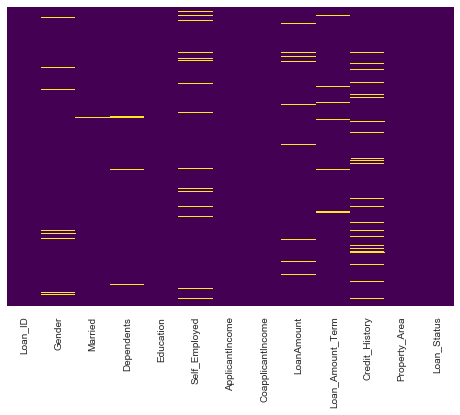

In [45]:
sns.heatmap(loan.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [46]:
loan.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Loan_ID               0
dtype: int64

In [47]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,592.000000,600.00000
mean,5403.459283,1621.245798,146.412162,342.00000
std,6109.041673,2926.248369,85.587325,65.12041
min,150.000000,0.000000,9.000000,12.00000
25%,2877.500000,0.000000,100.000000,360.00000
50%,3812.500000,1188.500000,128.000000,360.00000
75%,5795.000000,2297.250000,168.000000,360.00000
max,81000.000000,41667.000000,700.000000,480.00000


## Numerical variables

In [48]:
#List of numerical variables
numerical_features=[feature for feature in loan.columns if loan[feature].dtypes!='O']

print('Number of numerical variables',len(numerical_features))

loan[numerical_features].head()

Number of numerical variables 4


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849,0.0,NaN,360.0
1,4583,1508.0,128.0,360.0
2,3000,0.0,66.0,360.0
3,2583,2358.0,120.0,360.0
4,6000,0.0,141.0,360.0


In [49]:
#Replace 0 with NaN
loan[['CoapplicantIncome']]=loan[['CoapplicantIncome']].replace(0,np.nan)

In [50]:
## We will print the numerical nan variables and percentage of missing values

for feature in numerical_features:
    print("{}: {}% missing value".format(feature,np.around(loan[feature].isnull().mean(),4)))

ApplicantIncome: 0.0% missing value
CoapplicantIncome: 0.4446% missing value
LoanAmount: 0.0358% missing value
Loan_Amount_Term: 0.0228% missing value


In [51]:
## Replacing the numerical Missing Values

for feature in numerical_features:
    ## We will replace by using median since there are outliers
    median_value=loan[feature].median()
    
    ## create a new feature to capture nan values
    loan[feature+'nan']=np.where(loan[feature].isnull(),1,0)
    loan[feature].fillna(median_value,inplace=True)
    
loan[numerical_features].isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
dtype: int64

Since the numerical variables are skewed we will perform log normal distribution

In [52]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,ApplicantIncomenan,CoapplicantIncomenan,LoanAmountnan,Loan_Amount_Termnan
count,614.000000,614.000000,614.000000,614.000000,614.0,614.000000,614.000000,614.000000
mean,5403.459283,2584.304430,145.752443,342.410423,0.0,0.444625,0.035831,0.022801
std,6109.041673,2568.174218,84.107233,64.428629,0.0,0.497329,0.186019,0.149391
min,150.000000,16.120001,9.000000,12.000000,0.0,0.000000,0.000000,0.000000
25%,2877.500000,2064.750000,100.250000,360.000000,0.0,0.000000,0.000000,0.000000
50%,3812.500000,2166.000000,128.000000,360.000000,0.0,0.000000,0.000000,0.000000
75%,5795.000000,2297.250000,164.750000,360.000000,0.0,1.000000,0.000000,0.000000
max,81000.000000,41667.000000,700.000000,480.000000,0.0,1.000000,1.000000,1.000000


In [53]:
import numpy as np
num_features=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

for feature in num_features:
    loan[feature]=np.log(loan[feature])

In [54]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncomenan,CoapplicantIncomenan,LoanAmountnan,Loan_Amount_Termnan
0,LP001002,Male,No,0,Graduate,No,8.674026,7.680637,4.852030,5.886104,1,Urban,Y,0,1,1,0
1,LP001003,Male,Yes,1,Graduate,No,8.430109,7.318540,4.852030,5.886104,1,Rural,N,0,0,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,8.006368,7.680637,4.189655,5.886104,1,Urban,Y,0,1,0,0
3,LP001006,Male,Yes,0,Not Graduate,No,7.856707,7.765569,4.787492,5.886104,1,Urban,Y,0,0,0,0
4,LP001008,Male,No,0,Graduate,No,8.699515,7.680637,4.948760,5.886104,1,Urban,Y,0,1,0,0


## Categorical Variables

In [55]:
categorical_features=[feature for feature in loan.columns if loan[feature].dtypes=='O']
categorical_features

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [56]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(loan[feature].unique())))

The feature is Loan_ID and number of categories are 614
The feature is Gender and number of categories are 3
The feature is Married and number of categories are 3
The feature is Dependents and number of categories are 5
The feature is Education and number of categories are 2
The feature is Self_Employed and number of categories are 3
The feature is Credit_History and number of categories are 3
The feature is Property_Area and number of categories are 3
The feature is Loan_Status and number of categories are 2


In [57]:
loan['Gender'].fillna(loan['Gender'].mode()[0], inplace= True)
loan['Married'].fillna(loan['Married'].mode()[0], inplace= True)
loan['Dependents'].fillna(loan['Dependents'].mode()[0], inplace= True)
loan['Self_Employed'].fillna(loan['Self_Employed'].mode()[0], inplace= True)
loan['Credit_History'].fillna(loan['Credit_History'].mode()[0], inplace= True)


In [58]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncomenan,CoapplicantIncomenan,LoanAmountnan,Loan_Amount_Termnan
0,LP001002,Male,No,0,Graduate,No,8.674026,7.680637,4.852030,5.886104,1.0,Urban,Y,0,1,1,0
1,LP001003,Male,Yes,1,Graduate,No,8.430109,7.318540,4.852030,5.886104,1.0,Rural,N,0,0,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,8.006368,7.680637,4.189655,5.886104,1.0,Urban,Y,0,1,0,0
3,LP001006,Male,Yes,0,Not Graduate,No,7.856707,7.765569,4.787492,5.886104,1.0,Urban,Y,0,0,0,0
4,LP001008,Male,No,0,Graduate,No,8.699515,7.680637,4.948760,5.886104,1.0,Urban,Y,0,1,0,0


In [59]:
from sklearn import preprocessing 

In [60]:
categorical=['Gender','Married', 'Dependents','Education','Self_Employed','Credit_History','Property_Area','Loan_Status']
for feature in categorical:
    le=preprocessing.LabelEncoder()
    loan[feature]=le.fit_transform(loan[feature])

In [61]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncomenan,CoapplicantIncomenan,LoanAmountnan,Loan_Amount_Termnan
0,LP001002,1,0,0,0,0,8.674026,7.680637,4.852030,5.886104,1,2,1,0,1,1,0
1,LP001003,1,1,1,0,0,8.430109,7.318540,4.852030,5.886104,1,0,0,0,0,0,0
2,LP001005,1,1,0,0,1,8.006368,7.680637,4.189655,5.886104,1,2,1,0,1,0,0
3,LP001006,1,1,0,1,0,7.856707,7.765569,4.787492,5.886104,1,2,1,0,0,0,0
4,LP001008,1,0,0,0,0,8.699515,7.680637,4.948760,5.886104,1,2,1,0,1,0,0


## Feature Scaling

In [62]:
feature_scale=[feature for feature in loan.columns if feature not in ['Loan_ID','Loan_Status']]
from sklearn.preprocessing import StandardScaler

In [63]:
scaler=StandardScaler()
scaler.fit(loan[feature_scale])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [64]:
scaler.transform(loan[feature_scale])

array([[ 0.47234264, -1.37208932, -0.73780632, ...,  1.11762438,
         5.18739732, -0.15275252],
       [ 0.47234264,  0.72881553,  0.25346957, ..., -0.894755  ,
        -0.1927749 , -0.15275252],
       [ 0.47234264,  0.72881553, -0.73780632, ...,  1.11762438,
        -0.1927749 , -0.15275252],
       ...,
       [ 0.47234264,  0.72881553,  0.25346957, ..., -0.894755  ,
        -0.1927749 , -0.15275252],
       [ 0.47234264,  0.72881553,  1.24474546, ...,  1.11762438,
        -0.1927749 , -0.15275252],
       [-2.11710719, -1.37208932, -0.73780632, ...,  1.11762438,
        -0.1927749 , -0.15275252]])

In [65]:
data=pd.DataFrame(scaler.transform(loan[feature_scale]),columns=feature_scale)

In [66]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,ApplicantIncomenan,CoapplicantIncomenan,LoanAmountnan,Loan_Amount_Termnan
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.516199,-0.046851,-0.010533,0.265231,0.411733,1.223298,0.0,1.117624,5.187397,-0.152753
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,0.137879,-0.750711,-0.010533,0.265231,0.411733,-1.318513,0.0,-0.894755,-0.192775,-0.152753
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.519352,-0.046851,-1.347068,0.265231,0.411733,1.223298,0.0,1.117624,-0.192775,-0.152753
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.751478,0.118242,-0.140758,0.265231,0.411733,1.223298,0.0,-0.894755,-0.192775,-0.152753
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.555733,-0.046851,0.184647,0.265231,0.411733,1.223298,0.0,1.117624,-0.192775,-0.152753


In [67]:
from sklearn.decomposition import PCA

In [68]:
pca=PCA(n_components=2)
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [69]:
X=pca.transform(data)

In [70]:
X.shape

(614, 2)

In [71]:
Y=loan['Loan_Status']

In [72]:
Y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

In [73]:
# Split the dataset into 75% Training set and 25% Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [75]:
#Create a function within many Machine Learning Models
def models(X_train,Y_train):
  
  #Using Logistic Regression Algorithm to the Training Set
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, Y_train)
  
  #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    knn.fit(X_train, Y_train)

  #Using SVC method of svm class to use Support Vector Machine Algorithm
    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state = 0)
    svc_lin.fit(X_train, Y_train)

  #Using SVC method of svm class to use Kernel SVM Algorithm
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel = 'rbf', random_state = 0)
    svc_rbf.fit(X_train, Y_train)

  #Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, Y_train)

  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train, Y_train)

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    forest.fit(X_train, Y_train)
    #print model accuracy on the training data.
    print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
    print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
    print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
    print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
    print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
    print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
    print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
  
    return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [76]:
model = models(X_train,Y_train)

[0]Logistic Regression Training Accuracy: 0.6760869565217391
[1]K Nearest Neighbor Training Accuracy: 0.7347826086956522
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.6760869565217391
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.6782608695652174
[4]Gaussian Naive Bayes Training Accuracy: 0.6760869565217391
[5]Decision Tree Classifier Training Accuracy: 1.0
[6]Random Forest Classifier Training Accuracy: 0.9804347826086957


In [77]:
#Show the confusion matrix and accuracy for all of the models on the test data
#Classification accuracy is the ratio of correct predictions to total predictions made.
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
    cm = confusion_matrix(Y_test, model[i].predict(X_test))
  
    TN = cm[0][0]
    TP = cm[1][1]
    FN = cm[1][0]
    FP = cm[0][1]
  
    print(cm)
    print('Model[{}] Testing Accuracy = "{}!"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
    print()# Print a new line


[[  0  43]
 [  0 111]]
Model[0] Testing Accuracy = "0.7207792207792207!"

[[ 6 37]
 [14 97]]
Model[1] Testing Accuracy = "0.6688311688311688!"

[[  0  43]
 [  0 111]]
Model[2] Testing Accuracy = "0.7207792207792207!"

[[  0  43]
 [  0 111]]
Model[3] Testing Accuracy = "0.7207792207792207!"

[[  0  43]
 [  0 111]]
Model[4] Testing Accuracy = "0.7207792207792207!"

[[12 31]
 [27 84]]
Model[5] Testing Accuracy = "0.6233766233766234!"

[[15 28]
 [30 81]]
Model[6] Testing Accuracy = "0.6233766233766234!"



In [78]:
#Show the confusion matrix and accuracy for all of the models on the test data
#Classification accuracy is the ratio of correct predictions to total predictions made.
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(model)):
    print('Model ',i)
   #Check precision, recall, f1-score
    print( classification_report(Y_test, model[i].predict(X_test)) )
   #Another way to get the models accuracy on the test data
    print( accuracy_score(Y_test, model[i].predict(X_test)))
    print()#Print a new line

Model  0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.72      1.00      0.84       111

    accuracy                           0.72       154
   macro avg       0.36      0.50      0.42       154
weighted avg       0.52      0.72      0.60       154

0.7207792207792207

Model  1
              precision    recall  f1-score   support

           0       0.30      0.14      0.19        43
           1       0.72      0.87      0.79       111

    accuracy                           0.67       154
   macro avg       0.51      0.51      0.49       154
weighted avg       0.61      0.67      0.62       154

0.6688311688311688

Model  2
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.72      1.00      0.84       111

    accuracy                           0.72       154
   macro avg       0.36      0.50      0.42       154
weighte

In [79]:
#Print Prediction of Random Forest Classifier model
pred = model[1].predict(X_test)
print(pred)

#Print a space
print()

#Print the actual values
print(Y_test)

[0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0
 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1]

454    1
52     0
536    1
469    0
55     1
62     0
539    1
432    1
367    0
482    1
310    1
498    1
233    1
361    1
424    1
357    0
449    0
386    1
473    1
553    0
48     0
433    1
243    1
356    1
187    1
511    1
440    1
173    1
211    0
548    0
      ..
533    0
452    0
355    1
266    1
118    0
144    1
403    1
603    1
366    0
568    0
235    1
239    1
315    1
318    1
132    1
566    1
279    1
493    1
358    0
425    1
592    1
308    0
96     1
443    1
532    0
399    0
89     1
271    1
563    1
162    0
Name: Loan_Status, Length: 154, dtype: int32


In [80]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [81]:
cross_val=cross_val_score(model[2],X,Y,cv=10,scoring='accuracy').mean()

In [82]:
print(cross_val)

0.6873276086390842


In [83]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1,10,100,1000], 'kernel':['linear']},
              {'C': [1,10,100,1000],'kernel':['rbf'],'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}]
grid_search= GridSearchCV(estimator = model[2],
                         param_grid=parameters,
                         scoring ='accuracy',
                         cv=10,
                         n_jobs = -1)
grid_search =grid_search.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [84]:
accuracy =grid_search.best_score_

In [85]:
grid_search.best_params_

{'C': 1, 'gamma': 0.7, 'kernel': 'rbf'}

In [86]:
from sklearn.svm import SVC
svc = SVC(C= 1, gamma= 0.7, kernel= 'rbf')

In [87]:
svc.fit(X_train,Y_train)
svc.score(X_train,Y_train)
y_pred=svc.predict(X_test)
print(accuracy_score(Y_test,y_pred))
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

0.7012987012987013
[[  0  43]
 [  3 108]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.72      0.97      0.82       111

    accuracy                           0.70       154
   macro avg       0.36      0.49      0.41       154
weighted avg       0.52      0.70      0.59       154



In [88]:
import pickle
#save the traind model
loan_prediction=pickle.dumps(svc)
#Load the pickel data
SV_from_pickle=pickle.loads(loan_prediction)